# **Classification de texte**


In [3]:
import pandas as pd
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
% matplotlib inline
import re

**Read train data and store them in a one dataframe**

In [4]:
d = []
data_files = ['Psy.csv','KatyPerry.csv','LMFAO.csv','Eminem.csv','Shakira.csv']
for file in data_files:
    data = pd.read_csv(file)
    d.append(data)
d = pd.concat(d)

In [5]:
d.head()
d['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

**class 0 is real comment**

**class 1 is a spam**

**Prepossing :**

**Clean DATA**

We don't need all the features. we keep just the columens CONTENT, CLASS

In [6]:
#d.drop('COMMENT_ID',axis=1,inplace=True)
d.drop('AUTHOR',axis=1,inplace=True)
d.drop('DATE',axis=1,inplace=True)



In [7]:
d.head()

,COMMENT_ID,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,watch?v=vtaRGgvGtWQ Check this out .﻿,1


We keep just  alphabet in comment

In [8]:
def process_content(content):
    return " ".join(re.findall("[A-Za-z]+",content.lower()))

In [9]:
d['processed_content'] = d['CONTENT'].apply(process_content)
d.head()

,COMMENT_ID,CONTENT,CLASS,processed_content
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check out this you tube channel kob...
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,Hey guys check out my new channel and our firs...,1,hey guys check out my new channel and our firs...
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,just for test I have to say murdev.com,1,just for test i have to say murdev com
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch v vtarggvgtwq check this out


In [10]:
d.drop('CONTENT',axis=1,inplace=True)


In [11]:
d.head()
d.shape

(1956, 3)

C:\Users\Hanaa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


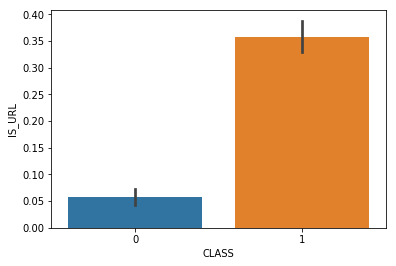

In [12]:
d['IS_URL'] = d['processed_content'].str.upper().str.contains(str.upper('http|https|www|.com'))
sns.barplot(x='CLASS', y='IS_URL', data=d) 
#checking the spam length against the feature is_url to find the spam words probability.

**Splitting the whole data into train and test sets**


In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(d['processed_content'],d['CLASS'],test_size=0.2,random_state=57)
x_train.shape

(1564,)

**tokenizing and filtering of stopwords**

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
x_train_counts = count_vect.fit_transform(x_train)
x_train_counts.shape


(1564, 3345)

**From occurrences to frequencies**

longer documents will have higher average count values than shorter documents, even they talk about the same topics so we solve this problem by divide the number of occurrences of each word in a document by the total number of words in the document wich called **tf for Term Frequencies**

Another refinement of tf is to downscale weights for words that occur in many documents in the corpus so they are less informative than those that occur only in a smaller portion of the corpus, wich called **tf–idf for “Term Frequency times Inverse Document Frequency”**

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
tranformer = TfidfTransformer()
x_train_tfidf = tranformer.fit_transform(x_train_counts)
x_train_tfidf.shape

(1564, 3345)

In [35]:
x_test_counts = count_vect.transform(x_test)
x_test_counts

<392x3345 sparse matrix of type '<class 'numpy.int64'>'
	with 2384 stored elements in Compressed Sparse Row format>

In [36]:
x_test_tfidf = tranformer.transform(x_test_counts)
x_test_tfidf

<392x3345 sparse matrix of type '<class 'numpy.float64'>'
	with 2384 stored elements in Compressed Sparse Row format>

***Model Selection***

we will use logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
predictions = model.predict(x_test_tfidf)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,predictions)


array([[176,   5],
       [ 24, 187]], dtype=int64)

we have 176 that classified as real comment and 187 as spam

but we classified 5 comment as spam when they are a real comment 

and 24 comment as real comment when the are a spam

In [21]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.97      0.92       181
          1       0.97      0.89      0.93       211

avg / total       0.93      0.93      0.93       392



The precision is the ratio tp / (tp + fp) 
- tp is the number of true positives  
- fp the number of false positives. 

The recall is the ratio tp / (tp + fn)
- tp is the number of true positives 
- fn the number of false negatives.

**Now we will use Random-Forest**

In [22]:
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
model = RandomForestClassifier()
model.fit(x_train_tfidf,y_train)
predictions = model.predict(x_test_tfidf)

C:\Users\Hanaa\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
confusion_matrix(y_test,predictions)

array([[177,   4],
       [ 23, 188]], dtype=int64)

In [24]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.89      0.98      0.93       181
          1       0.98      0.89      0.93       211

avg / total       0.94      0.93      0.93       392



**SVM Classification** 

In [42]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
model = LinearSVC()
model.fit(x_train_tfidf,y_train)
prediction = model.predict(x_test_tfidf)
f1_score(y_test,prediction)

0.9491525423728814

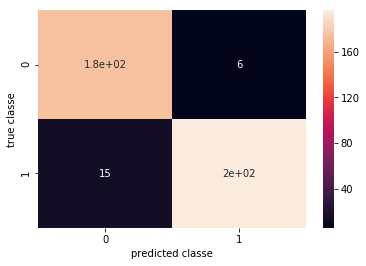

In [45]:
sns.heatmap(confusion_matrix(y_test,prediction),annot = True)
plt.ylabel('true classe')
plt.xlabel('predicted classe')
plt.show()

In [46]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.89      0.98      0.93       181
          1       0.98      0.89      0.93       211

avg / total       0.94      0.93      0.93       392

